In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()


,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set와 Test Set를 Numpy Array로 변경

In [3]:
import numpy as np

### 연습

In [10]:
# numpy의 column stack과 row stack
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

# 2개의 Array를 묶어서 컬럼 기반의 array로 만들기
combineA = [[i,j] for i,j in zip(testA, testB)]
print(np.array(combineA))

print('--------------------------------')

# numpy에서 컬럼 기반
combineB = np.column_stack((testA, testB))
print(combineB)

print('--------------------------------')

# numpy에서 index 기반
combineC = np.row_stack((testA, testB))
print(combineC)

print('--------------------------------')


[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
--------------------------------
[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
--------------------------------
[[ 1  2  3  4]
 [10 20 30 40]]
--------------------------------


In [5]:
# List Comprehension 연습
dataA = [1,2,3,4]

# 1) Normal case
dataB = []
for i in dataA:
    dataB.append(i*2)

dataB

[2, 4, 6, 8]

In [6]:
# 2) List Comprehension
dataC = [i*2 for i in dataA]
dataC


[2, 4, 6, 8]

---

In [12]:
# fruits의 feature
fruits_data = np.column_stack((fruits.length, fruits.weight))
fruits_data[:5]


array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [13]:
fruits_data.shape

(49, 2)

In [15]:
# Target
fruits_target = np.array(fruits.name)
fruits_target[:5]


array(['apple', 'apple', 'apple', 'apple', 'apple'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split

In [20]:
# Machine Learning을 위한 train과 test 분리
train_input, test_input, train_target, test_target = train_test_split(
    fruits_data,
    fruits_target,
    random_state=42,
    stratify=fruits_target
)

In [18]:
# kNN을 이용한 예측
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


1.0

### 수상한 과일?
#### length가 25cm이고 weight가 150g인 과일은 무엇인가?

In [37]:
fruit = np.array([[25, 150]])
kn.predict(fruit)


array(['berry'], dtype=object)

### 산포도로 확인해보기

In [24]:
import matplotlib.pyplot as plt

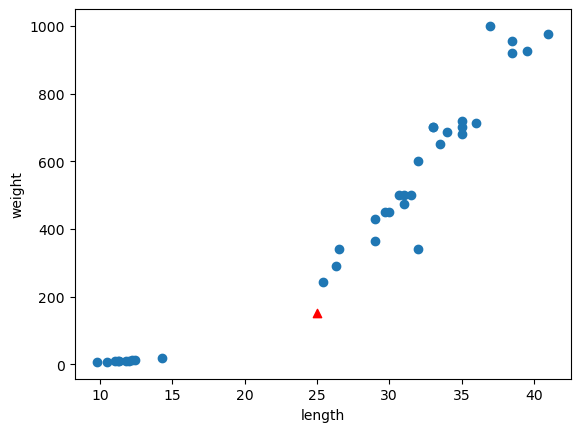

In [ ]:
plt.scatter(
    train_input[:,0],   # length
    train_input[:,1],   # weight
)

plt.scatter(
    25, # length
    150, # weight
    c='red',
    marker='^'
)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()



> apple 쪽인데 왜 berry로 예측되었을까?


### 이웃을 출력해보자

In [29]:
kn.kneighbors([[25, 150]])
# 앞 : 거리
# 뒤 : 이웃의 index



(array([[ 92.00086956, 130.73859415, 137.17988191, 138.39320793,
         140.00603558]]),
 array([[11, 20, 13, 22, 15]], dtype=int64))

In [30]:
indexes = kn.kneighbors([[25, 150]], return_distance=True)[1]
indexes

array([[11, 20, 13, 22, 15]], dtype=int64)

In [31]:
# 이웃 index에 해당하는 Feature를 출력해보자
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

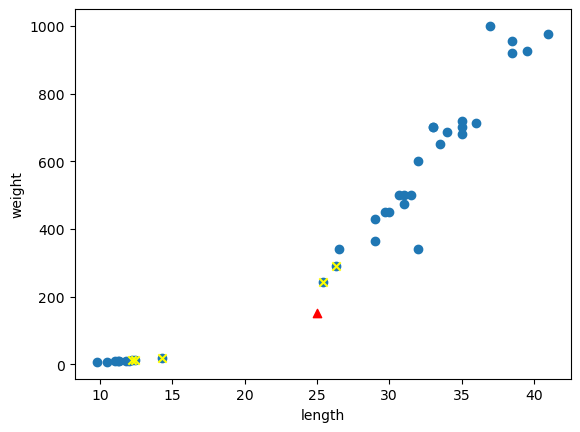

In [35]:
# 이웃의 위치 추가
plt.scatter(
    train_input[:,0],   # length
    train_input[:,1],   # weight
)

plt.scatter(
    25, # length
    150, # weight
    c='red',
    marker='^'
)

plt.scatter(
    train_input[indexes,0],
    train_input[indexes,1],
    c='yellow',
    marker='x'
)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [36]:
# 이웃의 target
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

---
### 기준을 맞추자

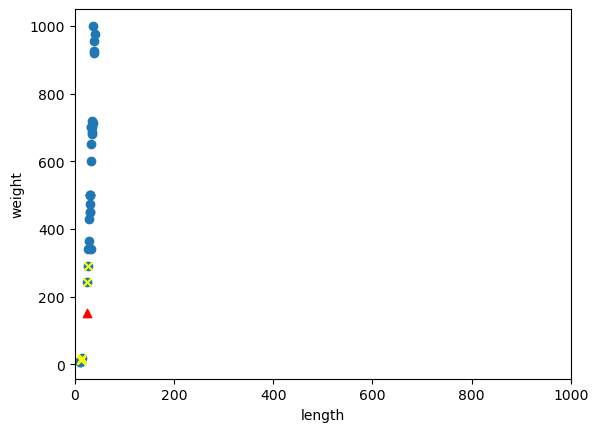

In [38]:
# 이웃의 위치 추가
plt.scatter(
    train_input[:,0],   # length
    train_input[:,1],   # weight
)

plt.scatter(
    25, # length
    150, # weight
    c='red',
    marker='^'
)

plt.scatter(
    train_input[indexes,0],
    train_input[indexes,1],
    c='yellow',
    marker='x'
)

plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


> xlim으로 weight와 length의 범위를 맞춰보니 sample이 length에는 거의 영향을 받지 않는다.

In [40]:
# length와 weight의 평균과 표준편차
mean = np.mean(train_input, axis=0)
mean

array([ 26.93333333, 441.98333333])

In [41]:
std = np.std(train_input, axis=0)
std



array([ 10.09141549, 325.61300692])

### train_data를 표준점수(z점수) 변경
표준점수 = (efeature - 평균) / 표준편차

In [43]:
train_scaled = (train_input - mean) / std
train_scaled[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### sklearn을 이용

In [44]:
from sklearn.preprocessing import StandardScaler


In [45]:
scaler = StandardScaler()
scaler.fit(train_input)


StandardScaler()

In [47]:
train_sacaled2 = scaler.transform(train_input)
train_sacaled2[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [62]:
train_scaled3 = scaler.fit_transform(train_input)
train_scaled3[:5]


array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

In [71]:
# 예측 데이터도 표준점수 적용
# new = ([25, 150] - mean) / std
new = scaler.transform([[25, 150]]) # 이전에 학습한 데이터를 이용할 때는 transform을 사용, 새로운 데이터를 이용할 때는 fit_transform을 사용
new


array([[-0.19158198, -0.89671889]])

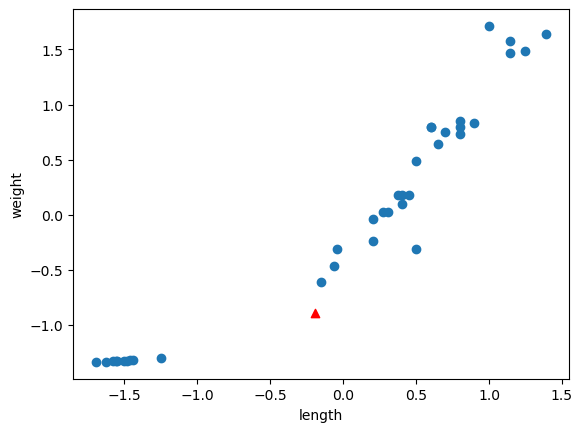

In [72]:
plt.scatter(
    train_scaled3[:,0],
    train_scaled3[:,1]
)

plt.scatter(
    new[0][0], # length
    new[0][1], # weight
    c='red',
    marker='^'
)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()



# kNN

In [73]:
kn.fit(train_scaled3, train_target)

KNeighborsClassifier()

In [74]:
test_scaled = scaler.transform(test_input)
test_scaled[:5]

array([[ 0.79935928,  0.86918109],
       [ 0.74981222,  0.54671239],
       [ 1.39392404,  1.56018542],
       [-1.18252324, -1.29627295],
       [-1.38071149, -1.31992065]])

In [75]:
kn.score(test_scaled, test_target)

1.0

In [76]:
kn.predict(new)

array(['apple'], dtype=object)

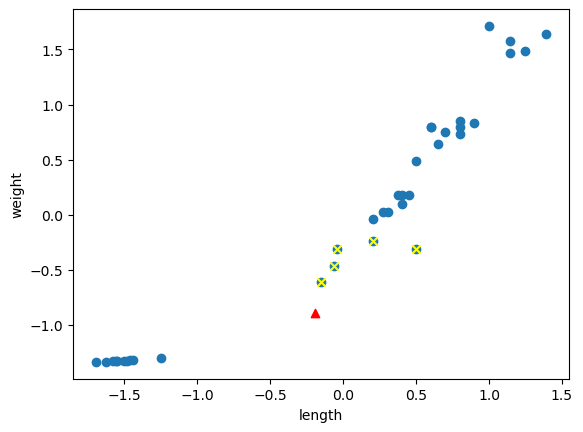

In [78]:
# 이웃의 위치 추가

distance, indexes = kn.kneighbors(new)

plt.scatter(
    train_scaled3[:,0],   # length
    train_scaled3[:,1],   # weight
)

plt.scatter(
    new[0][0], # length
    new[0][1], # weight
    c='red',
    marker='^'
)


plt.scatter(
    train_scaled3[indexes,0],
    train_scaled3[indexes,1],
    c='yellow',
    marker='x'
)


plt.xlabel('length')
plt.ylabel('weight')
plt.show()


> 정규화를 하니 berry가 아닌 apple로 예측되었다.
